# Modelling

## General Idea

Particles are used to represent
* object smaller than the grid spacing
* liquid and solid fuel particles
* water droplets
* massless tracer particles

As it is not possible to modell each individual particle, the particle ensemble is modelled as Lagrangian particles. This concept is based on the following assumptions
* definition of representative particles,
* each of the Lagrangian particles represents a set of physical particles with its properties, like the diameter spectrum, and
* interaction of the particles with the fluid and other particles.

## Transport Equations

As a particle moves in a fluid, it transfers momentum to a fluid element

$$
\mf f_b = \frac{1}{V_{cell}} \sum_{p \in cell}\left(\frac{\rho}{2} C_d A_{p,c} (\vec{v}_p - \vec{v})|\vec{v}_p - \vec{v}| - \frac{dm_p}{dt}(\vec{v}_p - \vec{v})\right)\quad ,
$$

with
* $\mf V_{cell}, \rho, \vec{v}$: gas phase properties
* $\mf \vec{v}_p, m_p, A_{p,c}$: particle properties
* $\mf C_d$: drag coefficient

The total particle acceleration for a single particle $\mf p$ is given by

$$
\mf \frac{du_p}{dt} = \vec{g} - \frac{1}{2}\frac{\rho C_dA_{p,c}}{m_p}( \vec{v}_p - \vec{v})|\vec{v}_p - \vec{v}|\quad ,
$$

and the particle position can be computed using the following equation

$$
\mf \frac{d\vec{x}_p}{dt} = \vec{u}_p\quad .
$$

The movement and momentum transfer of the particles depend on the drag coefficient $\mf C_d$, which can be computed as

$$
\mf C_d = \left\{ \begin{array}{lc} 24/Re_D & Re_D \lt 1 \\ 24 \cdot (0.85 + 0.15 Re_D ^{0.687}) / Re_D & 1 \lt Re_D \lt 1000 \\ 0.44 & 1000 \lt Re_D \end{array} \right.
$$

Where the Reynolds number is given as

$$
\mf Re_D = \frac{\rho |\vec{v}_p - \vec{v}| 2 r_p}{\mu(T)}\quad ,
$$

with
* $\mf \rho, \vec{v}, \mu(T)$: gas properties
* $\mf \vec{v}_p, r_p$: particle properties

This formula is for spherical particles, formulas for other shapes are available.

## Example – Single Particle Trajectory

An input file for FDS, where a single particle is injected with a given initial position and velocity, is shown in the following listing.

```{literalinclude} ../../../../data/particles/single_particle/single_particle.fds
```

In the above example, a particle property (`PART`) is defined. It states, that the particle species is a water (`WATER VAPOR`) droplet with a diameter of $\mf 1~mm$ (`DIAMETER`). In general, a diameter spectrum is definied, thus the diameter statement represents just a property of the distribution function, as shown later. Here, the option `MONODISPERSE=.TRUE.` is used to generate particle with a single diameter. The `SAMPLING_FACTOR` controls how many particles should be written to the output file, where its value states that every nth particle is written out. Here, every particle is recorded.

The particle is injected using the `INIT` statement. It defines the positon (`XYZ`), the velocity (`UVW`) and the number of injected particles (`N_PARTICLES`) of the particle property (`PART_ID`).



In [14]:
import fdsreader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = fdsreader.Simulation('../../../../data/particles/single_particle/rundir/')

In [10]:
part_pos = sim.particles[0].positions
part_time = sim.particles[0].times

In [15]:
px = []
py = []
pz = []
for cpos in part_pos:
    px.append(cpos[0,0])
    py.append(cpos[0,1])
    pz.append(cpos[0,2])
px = np.array(px)
py = np.array(py)
pz = np.array(pz)
print(part_z)

[0.01, 3.7784374, 4.3206706, 4.7510133, 5.023526, 5.0804024, 4.84928, 4.2399535, 3.1404283, 1.4121281, 0.01, 0.01, 0.01]


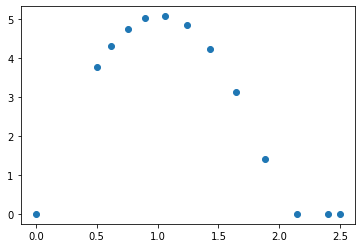

In [16]:
plt.scatter(part_time, pz)

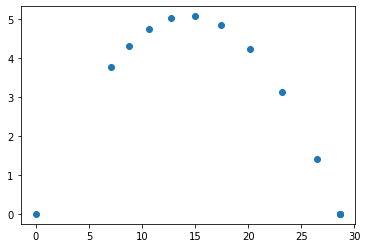

In [17]:
plt.scatter(np.sqrt(px**2 + py**2), pz)